# Part 2: Titanic

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
train_df = pd.read_csv("train.csv", low_memory=False)
test_df = pd.read_csv("test.csv", low_memory=False)

y_train = train_df["Survived"]
train_df = train_df.drop(columns="Survived")

In [4]:
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# Removing missing values

# Creating a new empty dataframe
missing_df = pd.DataFrame()
missing_df["Feature"] = train_df.columns

# Calculating the percentage of the missing values for each attribute
missing = ((train_df.isnull().sum() / len(train_df)) * 100).values
missing_df["Missing"] = missing
missing_df = missing_df[missing_df["Missing"] != 0]
missing_df = missing_df.sort_values(by="Missing", ascending=False)

missing_df

,Feature,Missing
9,Cabin,77.104377
4,Age,19.865320
10,Embarked,0.224467


We can start the pre-processing by dropping columns that do not offer much information. Here, the ticket number and the cabin attributes do not offer information that might be relevant for our predictions.


In [7]:
def missing(df):
    
    attributes = df.loc[df['Missing'] > 50 ]
    
    return list(attributes['Feature'])

to_remove = missing(missing_df)

def remove_missing(df, to_remove):
    
    return df.drop(columns=to_remove)

In [8]:
to_drop = ["Name", "Ticket"]
train_df = train_df.drop(columns=to_drop, axis=1)

In [9]:
train_df = remove_missing(train_df, to_remove)
train_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,NaN,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


We now get rid of missing values.

In [10]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax())
train_df


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
1,2,1,female,38.000000,1,0,71.2833,C
2,3,3,female,26.000000,0,0,7.9250,S
3,4,1,female,35.000000,1,0,53.1000,S
4,5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,S
887,888,1,female,19.000000,0,0,30.0000,S
888,889,3,female,29.699118,1,2,23.4500,S
889,890,1,male,26.000000,0,0,30.0000,C


Now we one-hot encode the categorical attributes: Sex, Embarked and Pclass.

In [11]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(train_df[col]))

In [12]:
train_dummies = pd.concat(dummies, axis=1)
train_df = pd.concat((train_df,train_dummies), axis=1)
train_df = train_df.drop(columns=cols)

train_df

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,888,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,889,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,890,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


Putting all the preprocessing steps into a function to perform it on the test data.

In [13]:
def preprocess(df):
    
    # Remove missing values
    missing_df = pd.DataFrame()
    missing_df["Feature"] = train_df.columns

    # Calculating the percentage of the missing values for each attribute
    missing = ((train_df.isnull().sum() / len(train_df)) * 100).values
    missing_df["Missing"] = missing
    missing_df = missing_df[missing_df["Missing"] != 0]
    missing_df = missing_df.sort_values(by="Missing", ascending=False)
    
    attributes = missing_df.loc[missing_df['Missing'] > 50 ]
    to_remove = list(attributes['Feature'])
    
    df = remove_missing(df, to_remove)
    
    # Drop unnecessary columns
    to_drop = ["Name", "Ticket", "Cabin"]
    df = df.drop(columns=to_drop, axis=1)
    
    # Replace the missing values with mean/most frequent
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())

    # One-hot encoding
    dummies = []
    cols = ['Pclass', 'Sex', 'Embarked']
    
    for col in cols:
        dummies.append(pd.get_dummies(df[col]))
        
    last_dummies = pd.concat(dummies, axis=1)
    df = pd.concat((df,last_dummies), axis=1)
    df = df.drop(columns=cols)
    
    return df

In [14]:
X_test = preprocess(test_df)
X_test

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,892,34.50000,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.00000,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.00000,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.00000,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.00000,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.00000,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.50000,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1


## Logistic Regression


In [15]:
import numpy as np


class log_reg:
    """Logistic regression model"""

    def __init__(self, X):
        D = X.shape[1]
        self.w = np.zeros((D,1))

    def fit(self,X,y,alpha=0.01):
        w_star = self.grad_desc(X,y,alpha)
        self.w = w_star


    def logistic(logit):
        return (1/(1 + np.exp(-logit)))

    def gradient(X, y, w):
        N, D = X.shape
        yh = log_reg.logistic(np.dot(X, w)) 
        grad = np.dot(np.transpose(X), yh - y) / N
        return grad

    def grad_desc(self,
                    X,  # N x D
                    y,  # N
                    alpha,  # learning rate
                    eps=1e-2,  # termination condition
                    ):
        self.iters=0
        curr_w = self.w
        N, D = X.shape
        g = np.inf
        while np.linalg.norm(g) > eps:
            self.iters += 1
            if self.iters >= 200000 :
                return curr_w
            g = log_reg.gradient(X, y, curr_w)
            curr_w = curr_w - alpha*g
        return curr_w

    def predict(self,X):
        yh = log_reg.logistic(np.dot(X, self.w))
        rounder = lambda x: round(x)
        vfunc = np.vectorize(rounder)
        yh = vfunc(yh)
        return yh
    
    

In [16]:
def evaluate_acc(y,yhat):
    acc = 0.0
    for i in range(len(y)):
        if y[i] == yhat[i]:
            acc += 1.0
    return acc/len(y) #as a fraction

In [17]:
X_tr = train_df
Y_tr = y_train.to_numpy()


model = log_reg(X_tr)
model.fit(X_tr,Y_tr, alpha=0.01)
yhat_test = model.predict(X_test)
yhat_test

/Users/eylul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


array([[0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0]])

In [18]:
train = pd.DataFrame(yhat_tr)
train

NameError: name 'yhat_tr' is not defined

In [ ]:
yhat_test = model.predict(X_test)
y = pd.DataFrame(yhat_test)
y

In [ ]:
yhat_transpose = yhat_test.transpose()
preds = [item[0] for item in yhat_transpose]

In [ ]:
passenger_id = test_df['PassengerId']
passenger_id

In [ ]:
y_train[:6]

In [ ]:
deneme = X_tr[:6]
deneme

In [ ]:
denemeY = model.predict(deneme)
y = pd.DataFrame(denemeY)
y

In [ ]:
deneme2 = model.predict(X_test)
y = pd.DataFrame(deneme2)
y

In [ ]:
df = pd.DataFrame(yhat_test)
df

In [ ]:
X_tr.shape

# Log Reg

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_df, y_train)
log_reg.predict(train_df)

predictions = log_reg.predict(X_test)


/Users/eylul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
pred_series = pd.Series(predictions)
pred_series

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [21]:
score = log_reg.score(train_df, y_train)
print(score)

0.8047138047138047


In [22]:
df = pd.concat([X_test['PassengerId'], pred_series], axis=1)
df = df.rename(columns={0: "Survived"})
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df.to_csv("newpreds.csv",index=False)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

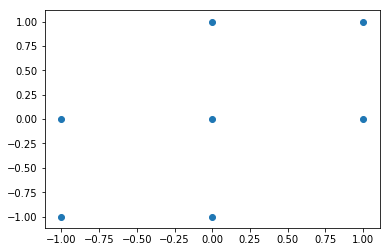

In [29]:
points = pd.DataFrame([[-1,-1], [-1, 0], [0, -1], [0, 0], [0, 1], [1, 0], [1, 1]])
plt.scatter(points[0], points[1])

In [31]:
from scipy import stats

col1 = points[0]
col2 = points[1]

slope, intercept, r, p, error = stats.linregress(col1, col2)

best_fit = slope * col1 + intercept

In [32]:
best_fit

0   -0.5
1   -0.5
2    0.0
3    0.0
4    0.0
5    0.5
6    0.5
Name: 0, dtype: float64

In [33]:
slope

0.5

In [34]:
intercept

0.0

In [35]:
error

0.3872983346207417

# Mean Squared Error

In [44]:
from sklearn.metrics import mean_squared_error

results = best_fit.to_numpy()
results

array([-0.5, -0.5,  0. ,  0. ,  0. ,  0.5,  0.5])

In [45]:
mean_squared_error(col1, results)

0.14285714285714285

# Mean Absolute Error

In [46]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(col1, results)


0.2857142857142857